# 🧹 Limpieza y Análisis de Datos con Pandas
Este notebook trabaja con el archivo `order_details.csv`.

---

## Índice

### **1. Carga de datos y exploración inicial**

### **2. Limpieza y preparación de datos**
- **2.1** Unión de DataFrames (`merge`)
- **2.2** Manejo de valores nulos (NaN)
- **2.3** Eliminación de duplicados
- **2.4** Conversión de tipos (`astype`)
- **2.5** Eliminación de columnas vacías

### **3. Análisis exploratorio**

#### 3.1 Estadísticas globales
- **3.1.1** Número de registros de detalle  
- **3.1.2** Cantidad total de pizzas (`sum(quantity)`)  
- **3.1.3** Cantidad promedio por pedido  

#### 3.2 Distribución por pizza
- **3.2.1** Agrupar por `pizza_id` para calcular:  
  - Total vendido  
  - Número de pedidos en los que aparece  
- **3.2.3** Pizzas más y menos populares  

#### 3.3 Análisis por pedido
- **3.3.1** Agrupar por `order_id` para calcular:  
  - Total de pizzas por pedido  
  - Número de líneas de detalle  
- **3.3.2** Distribución del tamaño de los pedidos  

### **4. Uso de NumPy**
- **4.1** Percentiles de cantidad total (`np.percentile`)  
- **4.2** Histogramas o distribuciones  

### **5. Preguntas clave**
- **5.1** Pizza más y menos vendida  
- **5.2** Promedio y mediana por pedido  
- **5.3** Porcentaje de pedidos por tamaño  
- **5.4** Pedidos anómalos (percentiles)  
- **5.5** Cómo calcular el valor estimado del pedido  

### **6. Guardar el dataset limpio**

### **7. Mini análisis final**


# 1. Importación y exploración inicial

In [1]:
import pandas as pd

# Cargar el CSV (ajusta la ruta si lo tienes en otra carpeta)
df = pd.read_csv("order_details.csv")

# Vista rápida de las primeras filas
display(df.head(10))
print("--------------------------------------------------------------------------")
# Información general de columnas y tipos
df.info()
print("--------------------------------------------------------------------------")
# Estadísticas básicas (incluyendo texto)
display(df.describe(include='all'))


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
5,6,2,thai_ckn_l,1
6,7,3,ital_supr_m,1
7,8,3,prsc_argla_l,1
8,9,4,ital_supr_m,1
9,10,5,ital_supr_m,1


--------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
--------------------------------------------------------------------------


,order_details_id,order_id,pizza_id,quantity
count,48620.000000,48620.000000,48620,48620.000000
unique,NaN,NaN,91,NaN
top,NaN,NaN,big_meat_s,NaN
freq,NaN,NaN,1811,NaN
mean,24310.500000,10701.479761,NaN,1.019622
std,14035.529381,6180.119770,NaN,0.143077
min,1.000000,1.000000,NaN,1.000000
25%,12155.750000,5337.000000,NaN,1.000000
50%,24310.500000,10682.500000,NaN,1.000000
75%,36465.250000,16100.000000,NaN,1.000000


# 2. Limpieza y preparación de datos

## 2.1 Unión de dos dataframes con la funcion (`merge`)

In [2]:
# Importacion del segundo dataframe
df2 = pd.read_csv("pizzas.csv")

# Union de los 2 dataframes
df_merged = df.merge(df2, how="inner", on="pizza_id")

# Vista rápida de las primeras filas
display(df_merged.head(10))
print("--------------------------------------------------------------------------")

print(df_merged.max())
print("--------------------------------------------------------------------------")
# Información general de columnas y tipos
df_merged.info()
print("--------------------------------------------------------------------------")
# Estadísticas básicas (incluyendo texto)
display(df_merged.describe(include='all'))

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00
5,6,2,thai_ckn_l,1,thai_ckn,L,20.75
6,7,3,ital_supr_m,1,ital_supr,M,16.50
7,8,3,prsc_argla_l,1,prsc_argla,L,20.75
8,9,4,ital_supr_m,1,ital_supr,M,16.50
9,10,5,ital_supr_m,1,ital_supr,M,16.50


--------------------------------------------------------------------------
order_details_id           48620
order_id                   21350
pizza_id            veggie_veg_s
quantity                       4
pizza_type_id         veggie_veg
size                         XXL
price                      35.95
dtype: object
--------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   pizza_type_id     48620 non-null  object 
 5   size              48620 non-null  object 
 6   price             48620 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 2.6+ MB
------------

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000
unique,NaN,NaN,91,NaN,32,5,NaN
top,NaN,NaN,big_meat_s,NaN,classic_dlx,L,NaN
freq,NaN,NaN,1811,NaN,2416,18526,NaN
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000
50%,24310.500000,10682.500000,NaN,1.000000,NaN,NaN,16.500000
75%,36465.250000,16100.000000,NaN,1.000000,NaN,NaN,20.250000


## 2.2 Detección y manejo de valores nulos (NaN)

In [3]:
# Conteo de valores nulos por columna
print("Valores nulos por columna:")
print(df_merged.isna().sum())
print("--------------------------------------------------------------------------")
# Eliminar filas que no tienen order_id, pizza_id y quantity (esenciales para análisis)
df_merged.dropna(subset=['order_id', 'pizza_id', 'quantity'], inplace=True)

print('\nDespués de limpieza de NaN:')
print(df_merged.isna().sum())
print("--------------------------------------------------------------------------")

display(df_merged.head(10))


Valores nulos por columna:
order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
dtype: int64
--------------------------------------------------------------------------

Después de limpieza de NaN:
order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
dtype: int64
--------------------------------------------------------------------------


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00
5,6,2,thai_ckn_l,1,thai_ckn,L,20.75
6,7,3,ital_supr_m,1,ital_supr,M,16.50
7,8,3,prsc_argla_l,1,prsc_argla,L,20.75
8,9,4,ital_supr_m,1,ital_supr,M,16.50
9,10,5,ital_supr_m,1,ital_supr,M,16.50


## 2.3 Eliminación de duplicados

In [4]:
# Detectar filas duplicadas completas
duplicados = df_merged[df_merged.duplicated()]
print("Filas duplicadas detectadas:")
display(duplicados)
print("--------------------------------------------------------------------------")

# Eliminar duplicados
df_merged.drop_duplicates(inplace=True)

print("Tamaño tras eliminar duplicados:", df_merged.shape)


Filas duplicadas detectadas:


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price


--------------------------------------------------------------------------
Tamaño tras eliminar duplicados: (48620, 7)


## 2.4 Conversión de tipos de datos (`astype`)

In [5]:
print("Tipos ANTES:")
print(df_merged.dtypes)
print("--------------------------------------------------------------------------")

# Convertir columnas numéricas que puedan venir como texto
df_merged['quantity'] = df_merged['quantity'].astype(int)
df_merged['price'] = df_merged['price'].astype(float)

print("\nTipos DESPUÉS:")
print(df_merged.dtypes)
print("--------------------------------------------------------------------------")

display(df_merged.head(10))


Tipos ANTES:
order_details_id      int64
order_id              int64
pizza_id             object
quantity              int64
pizza_type_id        object
size                 object
price               float64
dtype: object
--------------------------------------------------------------------------

Tipos DESPUÉS:
order_details_id      int64
order_id              int64
pizza_id             object
quantity              int64
pizza_type_id        object
size                 object
price               float64
dtype: object
--------------------------------------------------------------------------


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00
5,6,2,thai_ckn_l,1,thai_ckn,L,20.75
6,7,3,ital_supr_m,1,ital_supr,M,16.50
7,8,3,prsc_argla_l,1,prsc_argla,L,20.75
8,9,4,ital_supr_m,1,ital_supr,M,16.50
9,10,5,ital_supr_m,1,ital_supr,M,16.50


## 2.5 Eliminación de columnas vacías

In [6]:
# Eliminamos columnas que estén completamente vacías
print("Columnas del DataFrame antes de la eliminacion de columnas vacias:")
print(df_merged.columns.tolist())
df_merged.dropna(axis=1, how='all', inplace=True)

print("\nColumnas del DataFrame despues de la eliminacion de columnas vacias:")
print(df_merged.columns.tolist())


Columnas del DataFrame antes de la eliminacion de columnas vacias:
['order_details_id', 'order_id', 'pizza_id', 'quantity', 'pizza_type_id', 'size', 'price']

Columnas del DataFrame despues de la eliminacion de columnas vacias:
['order_details_id', 'order_id', 'pizza_id', 'quantity', 'pizza_type_id', 'size', 'price']


# 3. Análisis exploratorio 

## 3.1 Estadísticas globales

### 3.1.1 Calcular cuántos registros de detalle de pedido hay

In [7]:
print(df_merged.max)

<bound method DataFrame.max of        order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                     2         2  classic_dlx_m         1   classic_dlx    M   
2                     3         2  five_cheese_l         1   five_cheese    L   
3                     4         2    ital_supr_l         1     ital_supr    L   
4                     5         2     mexicana_m         1      mexicana    M   
...                 ...       ...            ...       ...           ...  ...   
48615             48616     21348  ckn_alfredo_m         1   ckn_alfredo    M   
48616             48617     21348  four_cheese_l         1   four_cheese    L   
48617             48618     21348   napolitana_s         1    napolitana    S   
48618             48619     21349     mexicana_l         1      mexicana    L   
48619             48620     21350      bbq_ckn_s         1       bbq_ckn    S 

### 3.1.2 Calcular la cantidad total de pizzas (sum(quantity))

In [8]:
df_total_pizzas = df_merged['quantity'].sum()
print(f"Cantidad total de pizzas vendidas: {df_total_pizzas}")

Cantidad total de pizzas vendidas: 49574


### 3.1.3 Calcular la cantidad promedio de pizzas por pedido

In [9]:
df_total_pedidos = df_merged['order_id'].nunique()
df_promedio_pizzas = df_total_pizzas / df_total_pedidos  

print(f"Número de pedidos únicos: {df_total_pedidos}")
print(f"Promedio de pizzas por pedido: {df_promedio_pizzas:.2f}")

Número de pedidos únicos: 21350
Promedio de pizzas por pedido: 2.32


## 3.2 Distribución por pizza

### 3.2.1 Agrupar por pizza_id para calcular:

#### · la cantidad total vendida (sum(quantity))

#### · la cantidad de pedidos en los que aparece (count(order_id) o nunique(order_id))

### 3.2.2 Identificar las pizzas más populares (más cantidad vendida) y menos populares.

## 3.3 Análisis por pedido

### 3.3.1 Agrupar por order_id para calcular:

#### · cantidad total de pizzas en cada pedido (sum(quantity))

In [10]:
order_stats = df_merged.groupby('order_id').agg({
    'quantity': 'sum',
    'order_details_id': 'count'
})

order_stats.columns = ['total_pizzas', 'total_items']
display(order_stats.head())

,total_pizzas,total_items
order_id,,
1,1,1
2,5,5
3,2,2
4,1,1
5,1,1


#### · número de líneas de detalle en cada pedido (count(order_details_id))

### 3.3.2 Verificar distribución de tamaño de los pedidos (por ejemplo: ¿cuántos pedidos tienen 1 pizza, más de 2, más de 3?)

In [ ]:
distribucion_pedidos = order_stats['total_pizzas'].value_counts().sort_index()

print("Distribución de pedidos (Cantidad de pizzas por pedido):")
display(distribucion_pedidos)

# 4 Uso de NumPy para análisis auxiliar

## 4.1 Usar np.percentile para calcular percentiles de la cantidad total de pizzas por pedido

## 4.2 Crear histogramas o distribuciones para ver qué tan frecuente son pedidos grandes vs. pequeños

<Axes: >

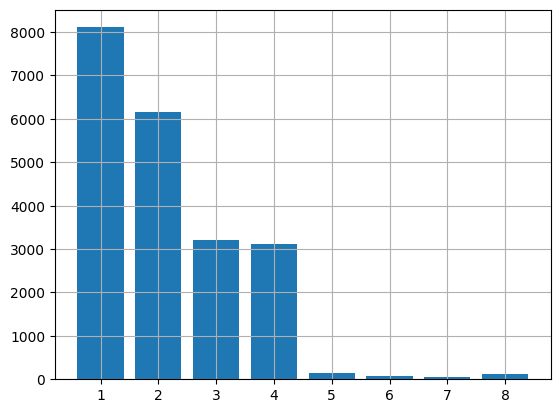

In [11]:
order_stats['total_pizzas'].hist(bins=range(1, 10), align='left', rwidth=0.8)

# 5. Preguntas

## 5.1 ¿Cuál es la pizza (pizza_id) más vendida en cuanto a cantidad y cuál la menos vendida?

## 5.2 ¿Cuál es la cantidad promedio de pizzas por pedido? ¿Y la mediana?

## 5.3 ¿Qué porcentaje de los pedidos tienen solo 1 pizza? ¿Y más de 2 pizzas?

In [12]:
total_orders = len(order_stats)
pedidos_1_pizza = distribucion_pedidos.get(1, 0)
pedidos_mas_2 = order_stats[order_stats['total_pizzas'] > 2].shape[0]

pct_1 = (pedidos_1_pizza / total_orders) * 100
pct_mas_2 = (pedidos_mas_2 / total_orders) * 100

print(f"Porcentaje de pedidos con 1 sola pizza: {pct_1:.2f}%")
print(f"Porcentaje de pedidos con más de 2 pizzas: {pct_mas_2:.2f}%")

NameError: name 'distribucion_pedidos' is not defined

## 5.4 ¿Existen pedidos que destaquen por tener una cantidad muy alta de pizzas? Identifícalos usando percentiles.

In [ ]:
umbral_anomalo = np.percentile(order_stats['total_pizzas'], 99)
anomalos = order_stats[order_stats['total_pizzas'] > umbral_anomalo]
#test
print(f"Consideramos anómalos los pedidos con más de {umbral_anomalo} pizzas.")
print(f"Se encontraron {len(anomalos)} pedidos anómalos.")
display(anomalos.head())

## 5.5 Si tuvieras los datos de precio de cada pizza, ¿cómo calcularías el valor estimado de cada pedido y cómo variarían los resultados anteriores?

In [ ]:
df_merged['line_total'] = df_merged['price'] * df_merged['quantity']

revenue_per_order = df_merged.groupby('order_id')['line_total'].sum()

print(f"Valor promedio del pedido ($): {revenue_per_order.mean():.2f}")
print(f"Pedido más caro ($): {revenue_per_order.max():.2f}")

## 6. Guardar el dataset limpio

In [ ]:
df_merged.to_csv('order_details_clean.csv', index=False)
print('Archivo order_details_clean.csv guardado correctamente.')

Archivo order_details_clean.csv guardado correctamente.


## 7. Mini análisis final por aplicación

In [ ]:
# ¿Qué apps tienen más tiempo medio de pantalla?
screen_time_media = (
    df.groupby('app_name')['screen_time(min)']
      .mean()
      .sort_values(ascending=False)
)

print("Tiempo medio de pantalla (min) por app:")
display(screen_time_media)

# ¿Qué apps generan más notificaciones?
notif_media = (
    df.groupby('app_name')['notifications']
      .mean()
      .sort_values(ascending=False)
)

print("Notificaciones medias por app:")
display(notif_media)


KeyError: 'app_name'